In [1]:
import pandas as pd
import numpy as np
atmospheric_data_df = pd.read_csv('../outputs/all_atmospheric_data.csv')

In [2]:
exterior_df = atmospheric_data_df[atmospheric_data_df["Location"] == "Exterior"]
interior_df = atmospheric_data_df[atmospheric_data_df['Location']!= 'Exterior']
kitchen_df = atmospheric_data_df[atmospheric_data_df["Location"].str.contains("Kitchen", case=False, na=False)]


In [3]:
kitchen_stats = kitchen_df[["Relative Humidity", "Air Temp", "Specific Humidity"]].describe()

In [4]:
exterior_matched = exterior_df[exterior_df["Report"].isin(kitchen_df["Report"])]
comparison_df = kitchen_df.merge(
    exterior_matched,
    on="Report",
    suffixes=("_Kitchen", "_Exterior")
)
comparison_df.drop(columns=['Location_Kitchen','Location_Exterior'],inplace=True)
comparison_df["Specific Humidity_Diff"] = (
    comparison_df["Specific Humidity_Kitchen"] - comparison_df["Specific Humidity_Exterior"]
)
comparison_df["Air Temp_Diff"] = (
    comparison_df["Air Temp_Kitchen"] - comparison_df["Air Temp_Exterior"]
)

In [13]:
import matplotlib.pyplot as plt
def plot_kitchen_rh_hist(df):
    kitchen_rh = df["Relative Humidity"].dropna()
    plt.figure(figsize=(8,5))
    plt.hist(kitchen_rh, bins=15, color="skyblue", edgecolor="black", alpha=0.8)
    plt.axvline(kitchen_rh.mean(), color="red", linestyle="--", linewidth=2, label=f"Mean = {kitchen_rh.mean():.1f}%")
    plt.axvline(kitchen_rh.median(), color="green", linestyle=":", linewidth=2, label=f"Median = {kitchen_rh.median():.1f}%")
    plt.title("Distribution of Relative Humidity in Kitchens")
    plt.xlabel("Relative Humidity (%)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

def plot_kitchen_temp_hist(df):
    kitchen_temp = df["Air Temp"].dropna()
    plt.figure(figsize=(8,5))
    plt.hist(kitchen_temp, bins=15, color="lightcoral", edgecolor="black", alpha=0.8)
    plt.axvline(kitchen_temp.mean(), color="red", linestyle="--", linewidth=2, label=f"Mean = {kitchen_temp.mean():.1f}°C")
    plt.axvline(kitchen_temp.median(), color="green", linestyle=":", linewidth=2, label=f"Median = {kitchen_temp.median():.1f}°C")
    plt.title("Distribution of Air Temperature in Kitchens")
    plt.xlabel("Air Temperature (°C)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


def plot_specific_and_relative(df):

    import matplotlib.pyplot as plt

    # Create a figure and primary y-axis
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot Specific Humidity on the primary y-axis (left)
    ax1.set_xlabel("Air Temperature (°C)")
    ax1.set_ylabel("Specific Humidity (g/kg)", color="blue")
    ax1.scatter(df["Air Temp"], df["Specific Humidity"], color="blue", marker='o', label="Specific Humidity")
    ax1.tick_params(axis='y', labelcolor="blue")

    # Create a secondary y-axis (right) sharing the same x-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel("Relative Humidity (%)", color="red")
    ax2.scatter(df["Air Temp"], df["Relative Humidity"], color="red", marker='s', label="Relative Humidity")
    ax2.tick_params(axis='y', labelcolor="red")

    # Add a title and grid
    plt.title("Specific vs Relative Humidity by Air Temperature")
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Kitchen data
Here we have collected the atmospheric data from the kitchen of 50 properties. This shows a summary of the conditions:

In [14]:
print(kitchen_stats)

       Relative Humidity   Air Temp  Specific Humidity
count          50.000000  50.000000          50.000000
mean           59.416000  19.958000           8.612000
std            11.969457   3.081021           1.982746
min            32.000000   9.700000           4.200000
25%            51.450000  18.650000           7.325000
50%            59.250000  19.700000           8.500000
75%            66.100000  21.900000           9.775000
max            86.700000  27.400000          14.100000


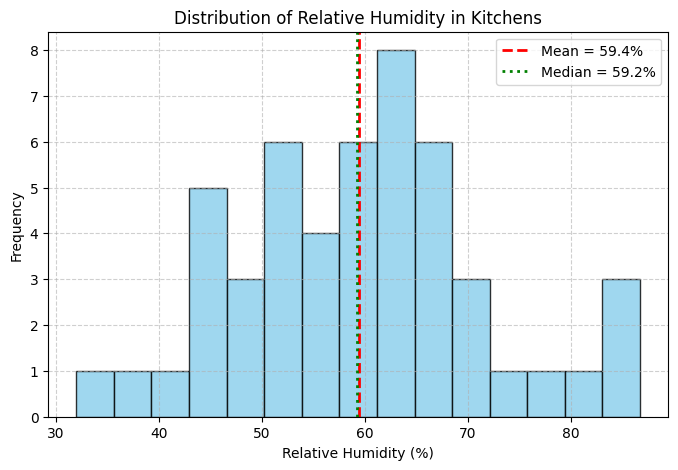

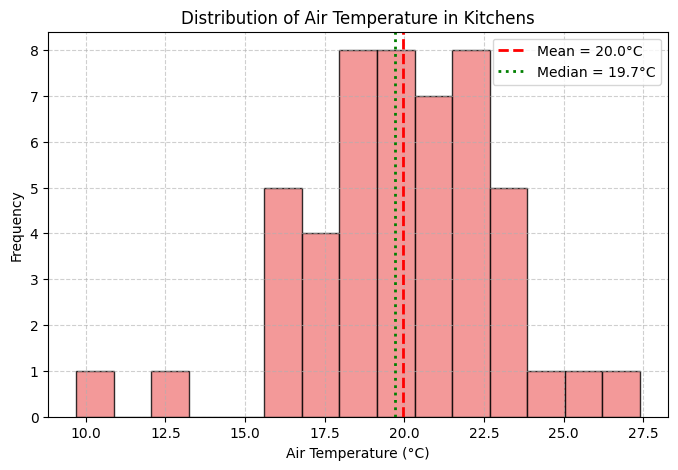

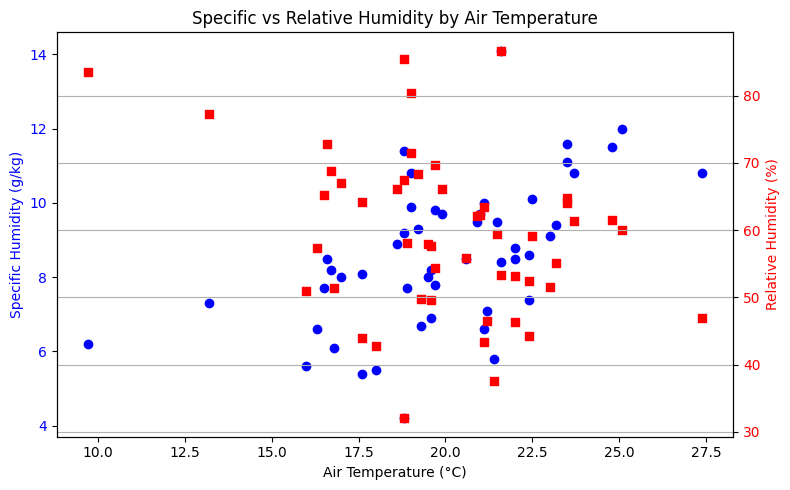

In [15]:
plot_kitchen_rh_hist(kitchen_df)
plot_kitchen_temp_hist(kitchen_df)
plot_specific_and_relative(kitchen_df)

# Kitchen and Exterior data

Now we will compare kitchen data to exterior data from the same property.